# The Hacker Within: ggplot2

This notebook contains the materials for the Hacker Within ggplot session at BIDS on November 1 2017. These materials were prepared by Rebecca Barter.

## Useful resources for learning ggplot2

- **ggplot2** book (https://www.amazon.com/dp/0387981403/ref=cm_sw_su_dp?tag=ggplot2-20) by Hadley Wickham
- **The layered grammar of graphics** (http://vita.had.co.nz/papers/layered-grammar.pdf) by Hadley Wickham

## Materials outline

I will begin by providing an overview of the layered grammar of graphics upon which ggplot2 is built. I will then teach ggplot2 by layering examples ontop of one another. Finally, I will introduce some advanced topics such as faceting and themes

1. Layered grammar of graphics

1. Basic ggplot2 plot types

1. Scales, axes, legends and positioning

1. Faceting

1. Themes: deviating from the defaults to produce beautiful graphics

By the end of this tutorial, you will be able to produce beautiful graphics such as this:
<img src="beautiful_plot.png" width="800">

# The layered grammar of graphics

Hadley Wickham built ggplot2 based on a set of principles outlines in his *layered grammar of graphics* (inspired by Wilkinson's orginal *grammar of graphics*). The basic idea is that a statistical graphic is a mapping from data to aesthetic attributed (such as colour, shape, and size) of geometric objects (such as points, lines, and bars).

We will use some of this terminology as we progess and discover that each piece of terminology corresponds to a type of object in ggplot2.

- **data**: a data frame containing the variables that you want to visualize

- **geoms**: geometric objects (circles, lines, text) that you will actually see

- **aesthetics**: the mapping from the data to the geographic objects (e.g. by describing position, size, colour, etc)



# Basic ggplot2

In this section, we are going to make our first plot. This plot will be based on the `diamonds` dataset that is imported with the ggplot package. Below, we show the first 6 rows of the `diamonds` dataset.

In [1]:
options(repr.plot.width=6, repr.plot.height=4)
library(ggplot2)
gapminder <- read.csv("data/gapminder-FiveYearData.csv")
# to download the data directly:
# gapminder <- read.csv("https://raw.githubusercontent.com/swcarpentry/r-novice-gapminder/gh-pages/_episodes_rmd/data/gapminder-FiveYearData.csv")

In [2]:
head(gapminder)

country,year,pop,continent,lifeExp,gdpPercap
Afghanistan,1952,8425333,Asia,28.801,779.4453
Afghanistan,1957,9240934,Asia,30.332,820.8530
Afghanistan,1962,10267083,Asia,31.997,853.1007
Afghanistan,1967,11537966,Asia,34.020,836.1971
Afghanistan,1972,13079460,Asia,36.088,739.9811
Afghanistan,1977,14880372,Asia,38.438,786.1134


The first argument we will use is the `ggplot` function. This function allows us to define the data that we will be using to make the plot, as well as the aesthetic properties that will be mapped to the geometric objects. That is, we will tell ggplot which data (a data frame) we are interested in and how each of the variables in our dataset will be used (e.g. as an x or y coordinate, as a coloring variable or a size variable, etc).
    

Below, we define our first ggplot object using the `ggplot` function, with the diamonds dataset and the x and y aesthetics defined by the `carat` and `price` variables, respectively. 

The output of this function is a grid with `carat` as the x-axis and `price` as the y-axis. However, we have not yet told ggplot what type of geometric object the data will be mapped to, so no data has been displayed.

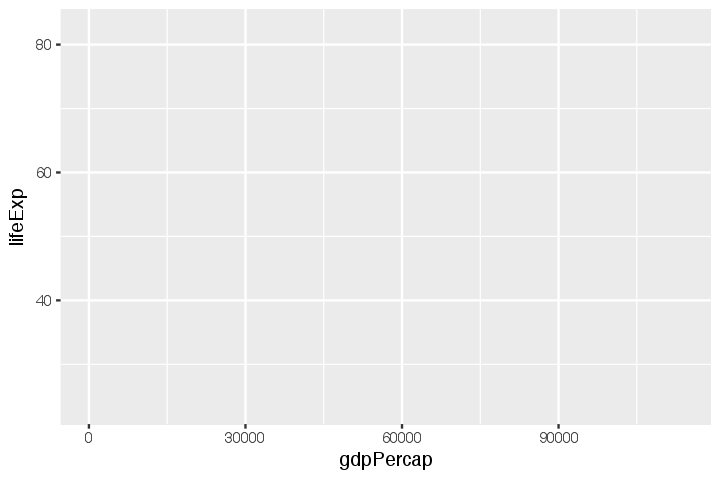

In [3]:
ggplot(gapminder, aes(x = gdpPercap, y = lifeExp))

## Aesthetic mapping to layers

Next, we will add a "geom" layer to our ggplot object. For example, we could add a points layer which would automatically adopt the aesthetic mapping described in the previous line of code.

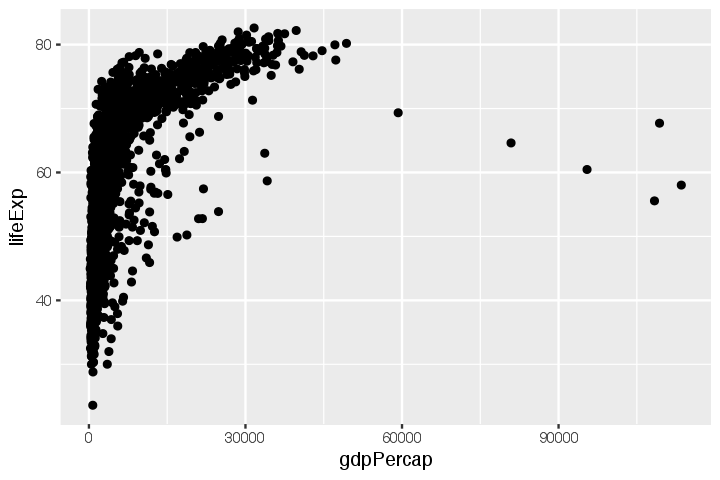

In [4]:
# describe the base ggplot object and tell it what data we are interested in along with the aesthetic mapping
ggplot(gapminder, aes(x = gdpPercap, y = lifeExp)) +
  # add a points layer on top
  geom_point()

What we have done is map each diamond (row) in the data to a point in the space defined by the price and carat value. The end result is an ugly blob of points. Fortunately, there are many things that we can do to make this blob of points pretter.

For example, we can change the transparency of all points by setting the alpha argument to a low value, changing the color of the points to be blue instead of black, and making the points smaller.

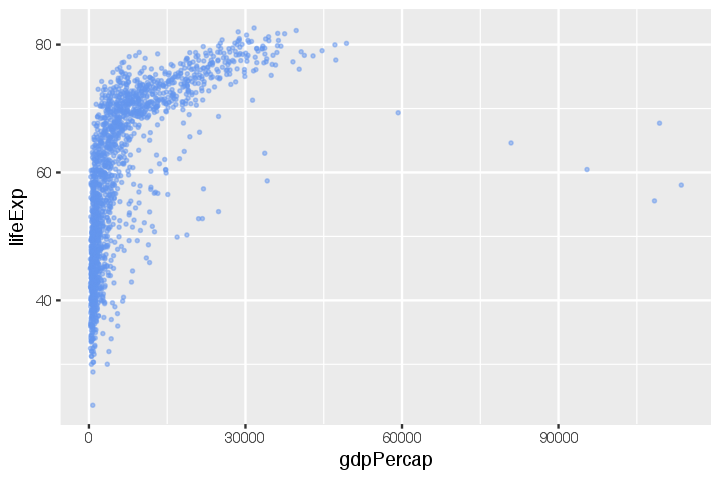

In [5]:
ggplot(gapminder, aes(x = gdpPercap, y = lifeExp)) +
  geom_point(alpha = 0.5, col = "cornflowerblue", size = 0.5)

Note that the above argument changed the alpha value and color for *all of the points at once*. 

One of the truly powerful features of ggplot2 is the ability to change these aesthetics based on the data itself. For example, perhaps we want to color each point by its `continent`. Instead of separating the data into five different subsets (based on the possible values of continent), and adding the different colored points separately, we can simply add all the points once and add an colour aesthetic map for `continent`.

Note that whenever we are using a variable from the data to describe an aesthetic property of a geom, this aesthetic property needs to be included in the `aes()` function.

In [6]:
unique(gapminder$continent)

[1] Asia     Europe   Africa   Americas Oceania 
Levels: Africa Americas Asia Europe Oceania

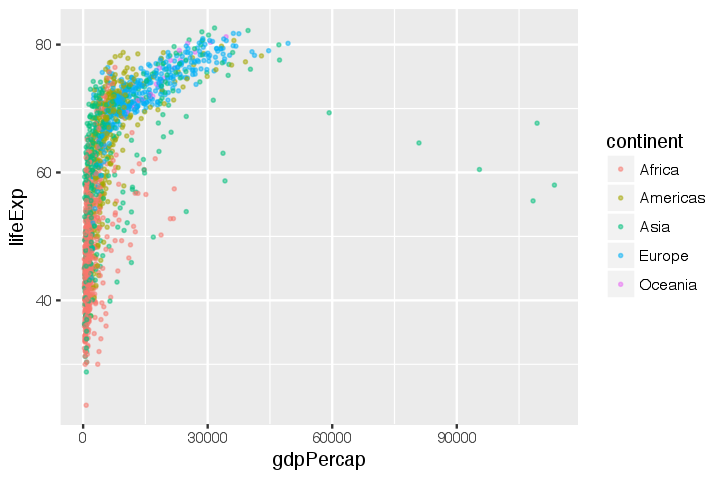

In [7]:
ggplot(gapminder, aes(x = gdpPercap, y = lifeExp, color = continent)) +
  geom_point(alpha = 0.5, size = 0.5)

We could also add aesthetic mappings for other features such as shape, size, transparancy (alpha), and more! For example, changing the size based on population:

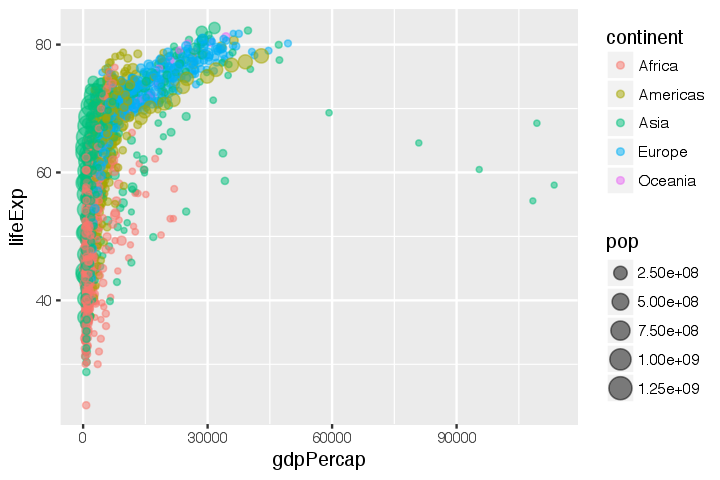

In [8]:
ggplot(gapminder, aes(x = gdpPercap, y = lifeExp, color = continent, size = pop)) +
  geom_point(alpha = 0.5)

## Types of layers

So far, we have only seen scatterplots (point geoms), however, there are many other geoms we could add, including:

- lines

- histograms

- boxplots and violin plots

- barplots

- smoothed curves

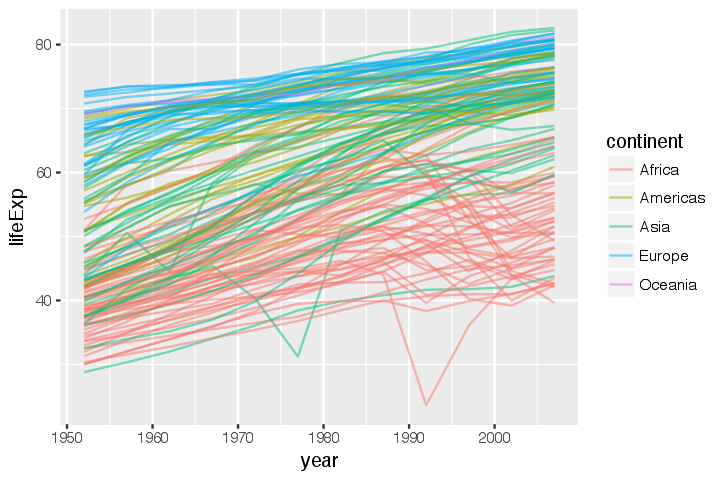

In [9]:
ggplot(gapminder, aes(x = year, y = lifeExp, group = country, color = continent)) +
  geom_line(alpha = 0.5)

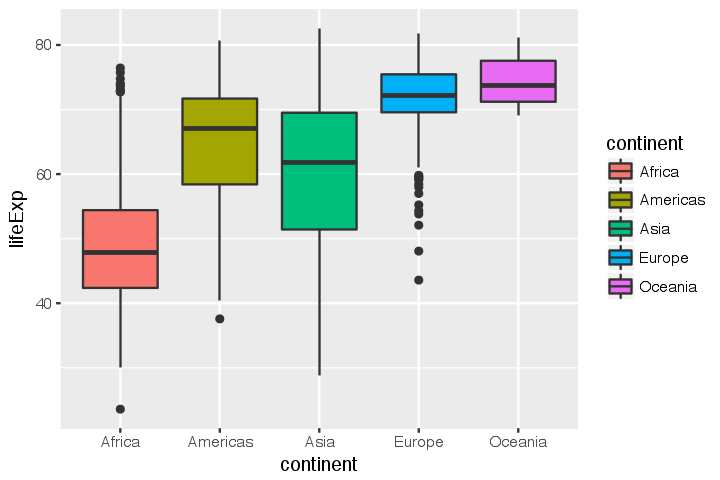

In [10]:
ggplot(gapminder, aes(x = continent, y = lifeExp, fill = continent)) +
  geom_boxplot()

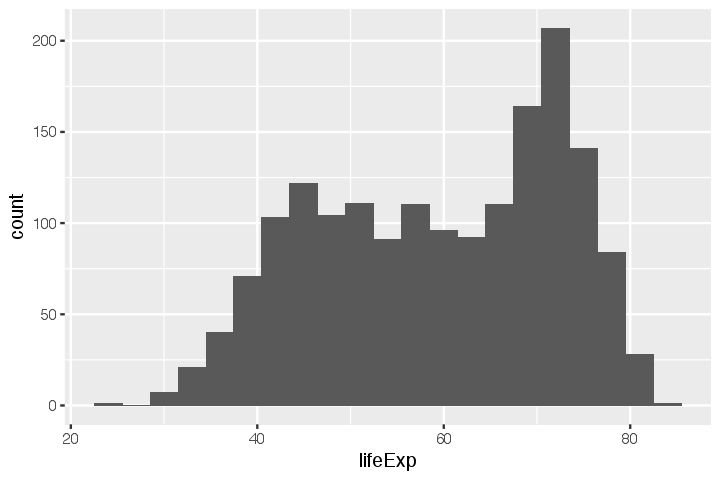

In [11]:
ggplot(gapminder, aes(x = lifeExp)) + 
  geom_histogram(binwidth = 3)

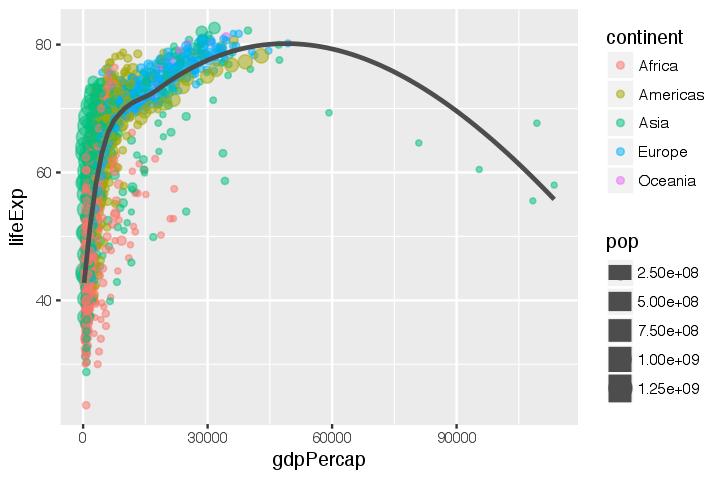

In [12]:
ggplot(gapminder, aes(x = gdpPercap, y = lifeExp, size = pop)) +
  geom_point(aes(color = continent), alpha = 0.5) +
  geom_smooth(se = FALSE, method = "loess", color = "grey30")

# Scales

We are going to return to our original scatterplot example to discuss scales, legend and positioning. 

To remind you, this scatterplot showed GDP per capita against life expectancy for each country colored by continent and sized by population.  

To keep things simple, let's filter to a single year.

In [13]:
library(dplyr)
gapminder_2007 <- gapminder %>% filter(year == 2007)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



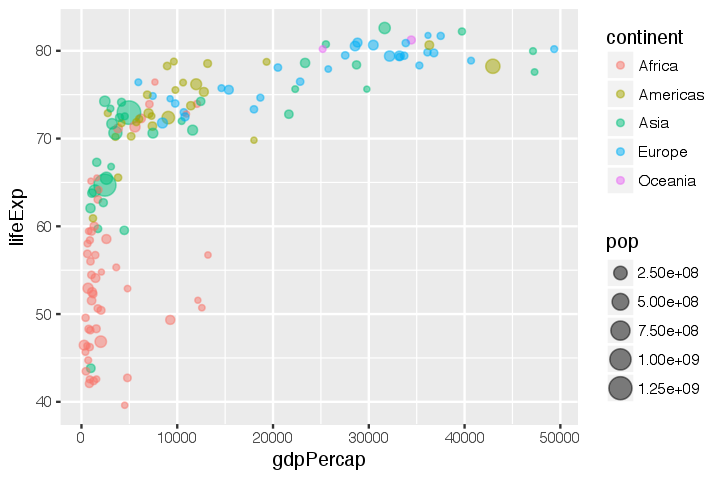

In [14]:
ggplot(gapminder_2007, aes(x = gdpPercap, y = lifeExp, color = continent, size = pop)) +
  geom_point(alpha = 0.5)

The scale of a plot describes the features of the space in which it is plotted. Arguably, it would be better to show `gdpPercap` on a logarithmic scale, rather than in its raw form. Fortunately, this is easy to do using a `scale` function, which can be considered another layer that transforms our plot.

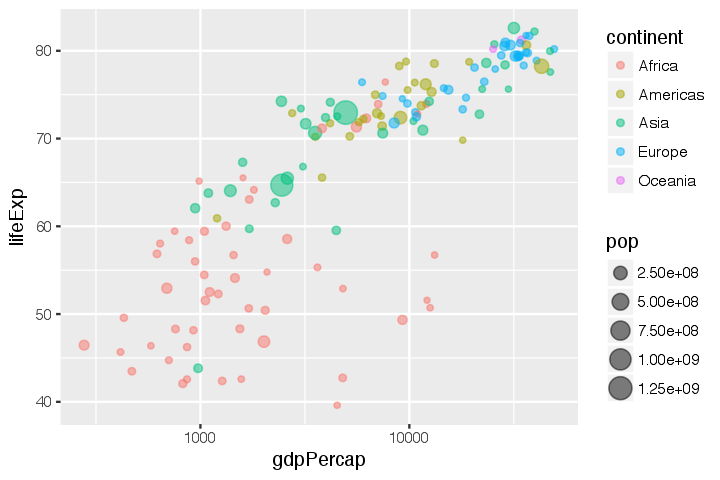

In [15]:
ggplot(gapminder_2007, aes(x = gdpPercap, y = lifeExp, color = continent, size = pop)) +
  geom_point(alpha = 0.5) +
  scale_x_log10()

The default x- (and y-) axes scales are `scale_x_continuous` and `scale_y_continuous`, but other options include `scale_x_sqrt` and `scale_x_reverse`.

Each of these scale functions has many options including changing the limits, the breaks, etc. For example in the plot below, we manipulate the x-axis by providing arguments to our `scale` function of choice.

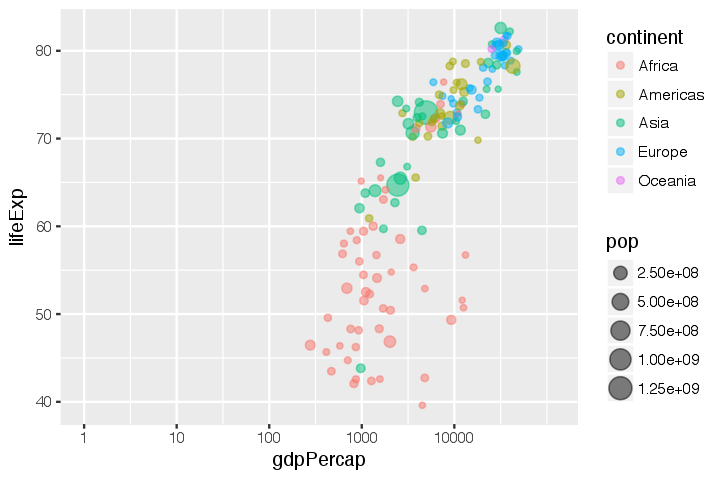

In [16]:
ggplot(gapminder_2007, aes(x = gdpPercap, y = lifeExp, color = continent, size = pop)) +
  geom_point(alpha = 0.5) +
  # clean the x-axis breaks
  scale_x_log10(breaks = c(1, 10, 100, 1000, 10000),
                limits = c(1, 120000))

Notice that we changed the name of the x-axis in the plot using the `name` arguemnt. This could also be done using the `labs` function. As an example, below we add a title and change the name of the y-axis and legends using the `labs` function.

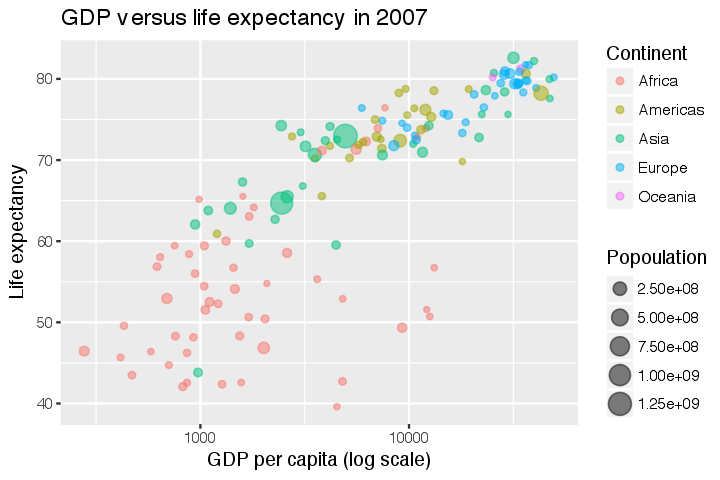

In [17]:
ggplot(gapminder_2007, aes(x = gdpPercap, y = lifeExp, color = continent, size = pop)) +
  # add scatter points
  geom_point(alpha = 0.5) +
  # log-scale the x-axis
  scale_x_log10() +
  # change labels
  labs(title = "GDP versus life expectancy in 2007",
       x = "GDP per capita (log scale)",
       y = "Life expectancy",
       size = "Popoulation",
       color = "Continent")

We could also manipulate the scale of the size variable. Below, we expand the range of sizes and clean up the variable name. Since the variable we provided for size is a continuous variable (`pop`) we use the `scale_size_continuous` argument.

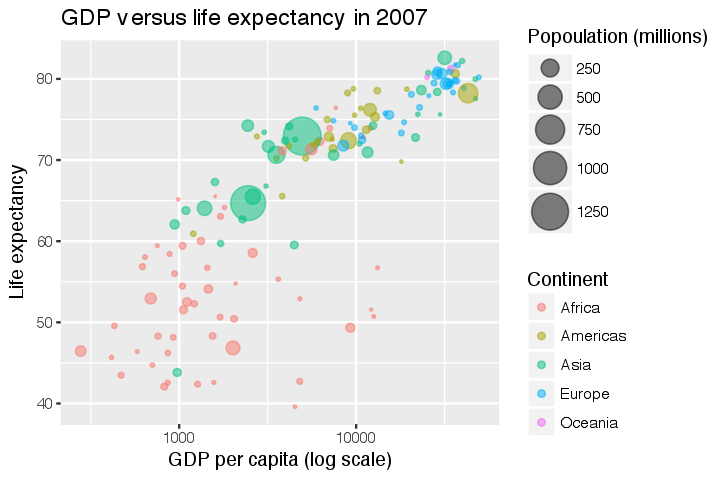

In [18]:
ggplot(gapminder_2007, aes(x = gdpPercap, y = lifeExp, color = continent, size = pop)) +
  # add scatter points
  geom_point(alpha = 0.5) +
  # log-scale the x-axis
  scale_x_log10() +
  # change labels
  labs(title = "GDP versus life expectancy in 2007",
       x = "GDP per capita (log scale)",
       y = "Life expectancy",
       size = "Popoulation (millions)",
       color = "Continent") +
  # change the size scale
  scale_size(range = c(0.1, 10),
             breaks = 1000000 * c(250, 500, 750, 1000, 1250),
             labels = c("250", "500", "750", "1000", "1250")) 

Scales also exist for other aesthetic featuers such as `fill`, `color`, `alpha`, etc.

# Faceting

Sometimes we want to be able to make multiple plots of the same thing across different categories. This can be achieved with minimal repetition using faceting.

In the example below, we will remake the plot above individually for each continent.

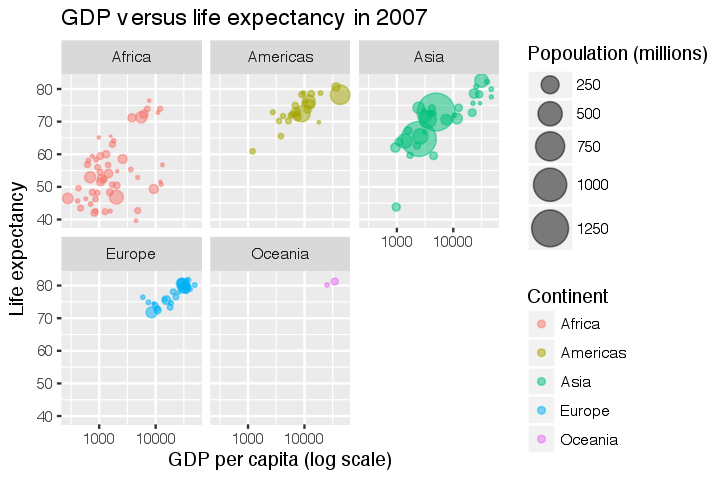

In [19]:
ggplot(gapminder_2007, aes(x = gdpPercap, y = lifeExp, color = continent, size = pop)) +
  # add scatter points
  geom_point(alpha = 0.5) +
  # log-scale the x-axis
  scale_x_log10() +
  # change labels
  labs(title = "GDP versus life expectancy in 2007",
       x = "GDP per capita (log scale)",
       y = "Life expectancy",
       size = "Popoulation (millions)",
       color = "Continent") +
  # change the size scale
  scale_size(range = c(0.1, 10),
             breaks = 1000000 * c(250, 500, 750, 1000, 1250),
             labels = c("250", "500", "750", "1000", "1250")) +
  # add faceting
  facet_wrap(~continent)

# Themes: making even more beautiful figures with ggplot2

One of the first things I usually do when I make a ggplot is edit the default theme. I actually really don't like the grey background, nor do I like having a grid unless it really helps with the plot interpretation.

One of the simplest themes is `theme_classic`, however there are several other themes to choose from. The `ggthemes` package offers many additional themes, but you could also make your own using the `theme()` function.

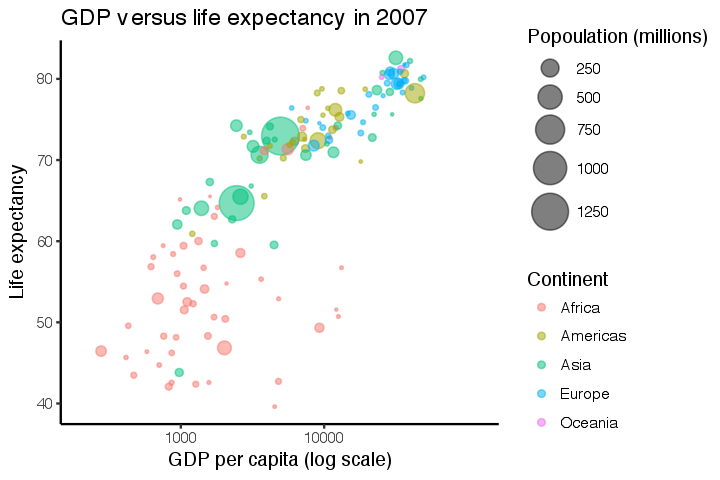

In [20]:
ggplot(gapminder_2007, aes(x = gdpPercap, y = lifeExp, color = continent, size = pop)) +
  # add scatter points
  geom_point(alpha = 0.5) +
  # clean the axes names and breaks
  scale_x_log10(breaks = c(1000, 10000),
                limits = c(200, 120000)) +
  # change labels
  labs(title = "GDP versus life expectancy in 2007",
       x = "GDP per capita (log scale)",
       y = "Life expectancy",
       size = "Popoulation (millions)",
       color = "Continent") +
  # change the size scale
  scale_size(range = c(0.1, 10),
             breaks = 1000000 * c(250, 500, 750, 1000, 1250),
             labels = c("250", "500", "750", "1000", "1250")) +
  # add a nicer theme
  theme_classic(base_family = "Helvetica")

As an example of further customization of the ggplot theme, below we do the following:

- move the legend to the top (set `legend.position = "top"` in `theme()`)
- removing the population legend (set `guide = "none"` in `scale_size()`)
- remove the axes lines (set `axis.line = element_blank()` in `theme()`)
- add some text annotations (add `geom_text` layer)

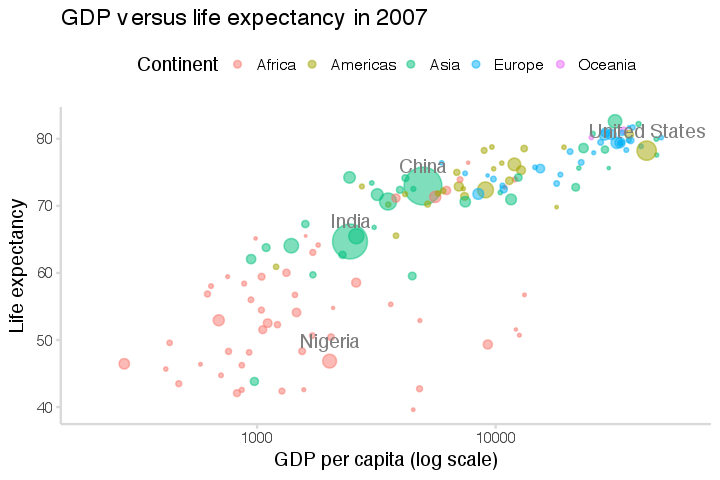

In [21]:
ggplot(gapminder_2007) +
  # add scatter points
  geom_point(aes(x = gdpPercap, y = lifeExp, color = continent, size = pop),
             alpha = 0.5) +
  # add some text annotations for the very large countries
  geom_text(aes(x = gdpPercap, y = lifeExp + 3, label = country),
            color = "grey50",
            data = filter(gapminder_2007, pop > 1000000000 | country %in% c("Nigeria", "United States"))) +
  # clean the axes names and breaks
  scale_x_log10(limits = c(200, 60000)) +
  # change labels
  labs(title = "GDP versus life expectancy in 2007",
       x = "GDP per capita (log scale)",
       y = "Life expectancy",
       size = "Popoulation",
       color = "Continent") +
  # change the size scale
  scale_size(range = c(0.1, 10),
             # remove size legend
             guide = "none") +
  # add a nicer theme
  theme_classic() +
  # place legend at top and grey axis lines
  theme(legend.position = "top",
        axis.line = element_line(color = "grey85"),
        axis.ticks = element_line(color = "grey85"))

# Saving your plots

You can save your plots using the `ggsave()` function.

In [22]:
p <- ggplot(gapminder_2007) +
  # add scatter points
  geom_point(aes(x = gdpPercap, y = lifeExp, color = continent, size = pop),
             alpha = 0.5) +
  # add some text annotations for the very large countries
  geom_text(aes(x = gdpPercap, y = lifeExp + 3, label = country),
            color = "grey50",
            data = filter(gapminder_2007, pop > 1000000000 | country %in% c("Nigeria", "United States"))) +
  # clean the axes names and breaks
  scale_x_log10(limits = c(200, 60000)) +
  # change labels
  labs(title = "GDP versus life expectancy in 2007",
       x = "GDP per capita (log scale)",
       y = "Life expectancy",
       size = "Popoulation",
       color = "Continent") +
  # change the size scale
  scale_size(range = c(0.1, 10),
             # remove size legend
             guide = "none") +
  # add a nicer theme
  theme_classic() +
  # place legend at top and grey axis lines
  theme(legend.position = "top",
        axis.line = element_line(color = "grey85"),
        axis.ticks = element_line(color = "grey85"))

# save the plot
ggsave("beautiful_plot.png", p, dpi = 300, width = 6, height = 4)